## Metody Nieparametryczne w Statystyce
# Zadanie 11
Za pomocą odpowiednich symulacji zbadać moc testów: Jarque-Bera, Shapiro-Wilka i Lillieforsa w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [11]:
import numpy as np, pandas as pd
from scipy.stats import jarque_bera, shapiro, t
from statsmodels.stats.diagnostic import lilliefors
from tqdm import tqdm
import matplotlib.pyplot as plt

2. Badanie mocy testów Jarque-Bera, Shapiro-Wilka i Lillieforsa kiedy dane pochodzą z rozkładu t-Studenta.

Test:  Jarque-Bera


100%|██████████| 145/145 [01:26<00:00,  1.68it/s]


Test:  Shapiro-Wilk


100%|██████████| 145/145 [00:08<00:00, 16.65it/s]


Test:  Lilliefors


100%|██████████| 145/145 [00:46<00:00,  3.14it/s]


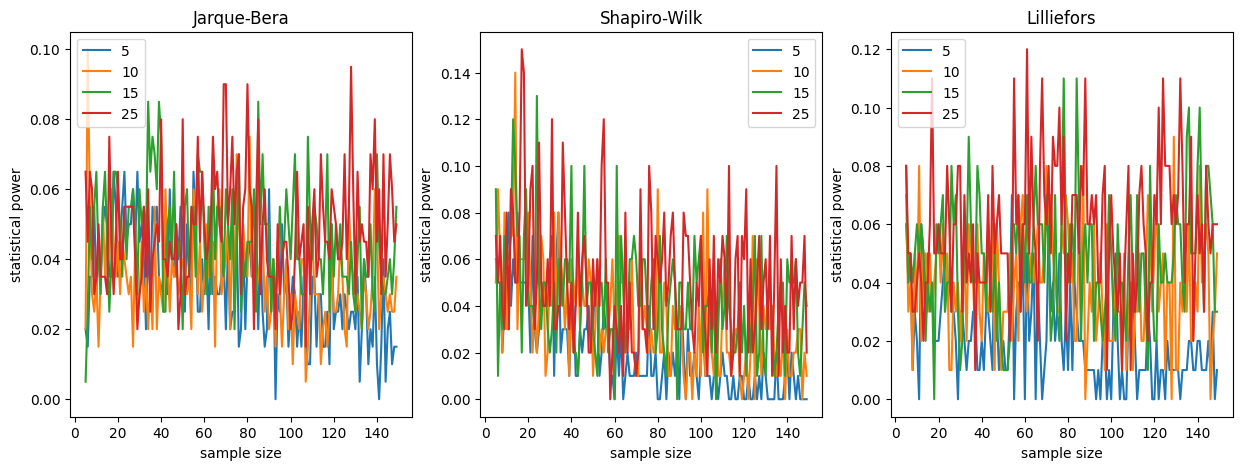

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for k in range (0, 3):
    print("Test: ", "Jarque-Bera" if k == 0 else "Shapiro-Wilk" if k == 1 else "Lilliefors")
    results = pd.DataFrame(columns=['5', '10', '15', '25'])
    buf = []
    for n in tqdm(range (5, 150)):
        for i in range (0, 100):
            for df in [5, 10, 15, 25]:
                #generowanie wektora liczbowego o rozkładzie t-Studenta
                x = t.rvs(df, size=n)
                #testowanie hipotezy o rozkładzie normalnym
                if k == 0:
                    buf.append(1 - jarque_bera(x)[1] < .05)
                if k == 1:
                    buf.append(1 - shapiro(x)[1] < .05)
                else:
                    buf.append(1 - lilliefors(x)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()

    results.plot(xlabel="sample size", ylabel="statistical power", legend=True, ax=axes[k],
                 title = "Jarque-Bera" if k == 0 else "Shapiro-Wilk" if k == 1 else "Lilliefors")